In [2]:
import pandas as pd

In [19]:
'''Importação dos dados, link de origem:
 https://dados.gov.br/dados/conjuntos-dados/taxas-dos-titulos-ofertados-pelo-tesouro-direto1
'''
data = pd.read_csv('PrecoTaxaTesouroDireto.csv', sep=';')



In [4]:
data.head(5)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro IPCA+,15/08/2024,24/04/2018,"4,56","4,68","2318,97","2302,31","2301,68"
1,Tesouro Prefixado,01/01/2023,24/04/2018,"9,07","9,19","666,41","662,99","662,76"
2,Tesouro Prefixado com Juros Semestrais,01/01/2021,24/04/2018,"7,78","7,90","1081,56","1078,72","1078,40"
3,Tesouro Prefixado,01/01/2019,03/04/2018,"6,14","6,26","956,74","955,94","955,71"
4,Tesouro IPCA+ com Juros Semestrais,15/05/2035,03/04/2018,"5,00","5,12","3484,09","3440,37","3439,54"


In [5]:
data.columns

Index(['Tipo Titulo', 'Data Vencimento', 'Data Base', 'Taxa Compra Manha',
       'Taxa Venda Manha', 'PU Compra Manha', 'PU Venda Manha',
       'PU Base Manha'],
      dtype='object')

In [6]:
#Check formato dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129701 entries, 0 to 129700
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Tipo Titulo        129701 non-null  object
 1   Data Vencimento    129701 non-null  object
 2   Data Base          129701 non-null  object
 3   Taxa Compra Manha  129701 non-null  object
 4   Taxa Venda Manha   129701 non-null  object
 5   PU Compra Manha    129701 non-null  object
 6   PU Venda Manha     129701 non-null  object
 7   PU Base Manha      129701 non-null  object
dtypes: object(8)
memory usage: 7.9+ MB


In [7]:
data.isnull().sum()

Tipo Titulo          0
Data Vencimento      0
Data Base            0
Taxa Compra Manha    0
Taxa Venda Manha     0
PU Compra Manha      0
PU Venda Manha       0
PU Base Manha        0
dtype: int64

In [8]:
data.groupby(['Tipo Titulo']).count()

,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Tipo Titulo,,,,,,,
Tesouro IGPM+ com Juros Semestrais,14947,14947,14947,14947,14947,14947,14947
Tesouro IPCA+,14169,14169,14169,14169,14169,14169,14169
Tesouro IPCA+ com Juros Semestrais,36315,36315,36315,36315,36315,36315,36315
Tesouro Prefixado,23771,23771,23771,23771,23771,23771,23771
Tesouro Prefixado com Juros Semestrais,22642,22642,22642,22642,22642,22642,22642
Tesouro Renda+ Aposentadoria Extra,480,480,480,480,480,480,480
Tesouro Selic,17377,17377,17377,17377,17377,17377,17377


In [9]:
#Troca das vírgulas pelos pontos para que seja possível converter de string para float
data=data.replace(',', '.', regex=True)

In [ ]:
#Converção de datas do formato string para datetime
data['Data Vencimento']=pd.to_datetime(data['Data Vencimento'])
data['Data Base']=pd.to_datetime(data['Data Base'])

In [10]:
#Convertendo valores do formato string para float
data['Taxa Compra Manha']=data['Taxa Compra Manha'].astype(float)
data['Taxa Venda Manha']=data['Taxa Venda Manha'].astype(float)
data['PU Compra Manha']=data['PU Compra Manha'].astype(float)
data['PU Venda Manha']=data['PU Venda Manha'].astype(float)
data['PU Base Manha']=data['PU Base Manha'].astype(float)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129701 entries, 0 to 129700
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Tipo Titulo        129701 non-null  object        
 1   Data Vencimento    129701 non-null  datetime64[ns]
 2   Data Base          129701 non-null  datetime64[ns]
 3   Taxa Compra Manha  129701 non-null  float64       
 4   Taxa Venda Manha   129701 non-null  float64       
 5   PU Compra Manha    129701 non-null  float64       
 6   PU Venda Manha     129701 non-null  float64       
 7   PU Base Manha      129701 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(1)
memory usage: 7.9+ MB


In [11]:
data[['Taxa Compra Manha',
       'Taxa Venda Manha', 
       'PU Compra Manha', 
       'PU Venda Manha',
       'PU Base Manha']].describe()

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
count,129701.000000,129701.000000,129701.000000,129701.000000,129701.000000
mean,7.095339,7.166112,2436.869995,2426.057983,2425.845213
std,4.403479,4.405195,2227.410926,2222.079793,2221.535894
min,-3.530000,-3.410000,0.000000,0.000000,0.000000
25%,4.460000,4.550000,956.330000,954.660000,954.600000
50%,6.500000,6.580000,1683.130000,1678.140000,1678.050000
75%,10.390000,10.460000,3161.090000,3145.300000,3144.430000
max,20.100000,20.130000,13148.820000,13140.320000,13140.320000


c:\Users\mathe\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '24/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
c:\Users\mathe\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '17/05/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
c:\Users\mathe\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '28/03/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
c:\Users\mathe\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '30/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

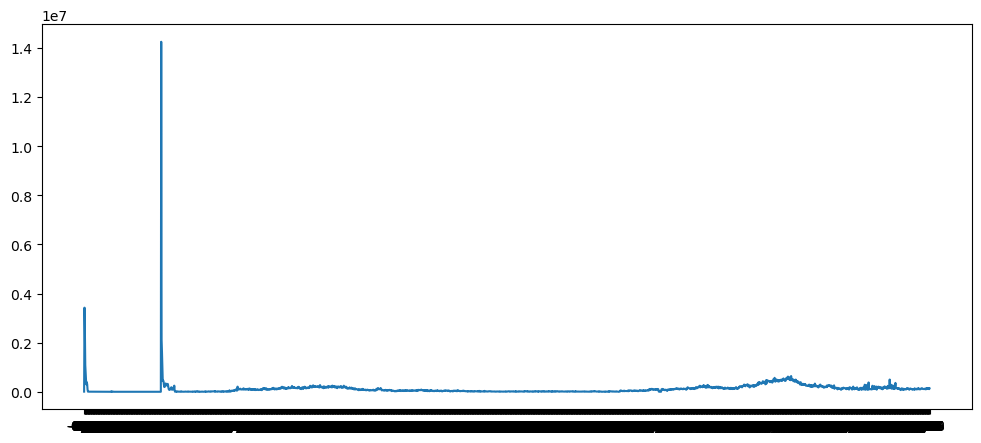

In [26]:
import matplotlib.pyplot as plt

data['Ano Base']=pd.DatetimeIndex(data['Data Base']).year

Taxa_compra = data['Ano Base'].groupby(data['Taxa Compra Manha']).mean()

fig,ax=plt.subplots(figsize=(12,5))
ax.plot(Taxa_compra)

In [28]:
Taxa_compra = data['Taxa Compra Manha'].groupby(data['Ano Base']).mean()

fig,ax=plt.subplots(figsize=(12,5))
ax.plot(Taxa_compra)

TypeError: Could not convert 0,000,120,240,330,3817,7418,3618,5518,4718,1317,678,718,788,768,839,059,239,268,978,728,338,268,258,2417,14 to numeric

In [ ]:
data.loc[data['']]